# Exploratory Data Analysis (EDA) – Pima Indians Diabetes Dataset

## 1. Giới thiệu dữ liệu

- Bộ dữ liệu Pima Indians Diabetes gồm 768 dòng, 8 đặc trưng và 1 nhãn `Outcome`.
- Các biến:
  - Pregnancies
  - Glucose
  - BloodPressure
  - SkinThickness
  - Insulin
  - BMI
  - DiabetesPedigreeFunction
  - Age
  - Outcome
- Mục tiêu: dự đoán khả năng mắc tiểu đường (`Outcome`: 1 = có, 0 = không).


## 2. Chuẩn bị

### 2.1. Khai báo thư viện cần thiết

In [157]:
from IPython import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2. Nạp dữ liệu

In [158]:
# Đường dẫn tới file csv
path = 'pima-indians-diabetes.csv'

# Tên các cột dữ liệu (lấy từ pima-indians-diabetes.names)
data_names = [
    'Pregnancies', 
    'Glucose', 
    'BloodPressure', 
    'SkinThickness', 
    'Insulin', 
    'BMI', 
    'DiabetesPedigreeFunction', 
    'Age', 
    'Outcome'
]

# Load dữ liệu
data = pd.read_csv(path, names = data_names)

## 3. Phân tích dữ liệu

In [159]:
# Tạo bản sao để thực hiện phân tích, tránh ảnh hưởng tới file dữ liệu gốc
df = data.copy()

### 3.1. Thống kê mô tả

#### 3.1.1. **Hiển thị một số thông tin về dữ liệu**

In [160]:
# Thông tin tổng quan về dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**:
- Tổng số dòng dữ liệu là 768 dòng
- Dữ liệu để phân lớp ở cột `Outcome`

#### 3.1.2. Kiểm tra tính toàn vẹn của dữ liệu

+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [161]:
has_null = df.isnull().sum().any()
has_nan  = df.isna().sum().any()
n_duplicated = df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
print(f'+ Có giá trị Nan: {has_nan}')
print(f'+ Số dòng trùng: {n_duplicated}')

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


**Nhận xét**:
+ Dữ liệu không có giá trị rỗng (NaN, Null) hay trùng.

#### 3.1.3. Các tính chất thống kê trên dữ liệu số

+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [162]:
description = df.describe().T
display.display(description)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Nhận xét**:
- Số lượng mẫu (count) ở các cột đều là 768, không có giá trị thiếu.
- Giá trị trung bình (mean) của Glucose, BMI, Age… cho thấy mức độ phổ biến của các đặc trưng trong tập dữ liệu.
- Độ lệch chuẩn (std) khá lớn ở các cột như Insulin, Age, cho thấy dữ liệu phân tán rộng.
- Một số cột có giá trị tối thiểu (min) bằng 0 (ví dụ: Glucose, BloodPressure, SkinThickness, Insulin, BMI), đây là dấu hiệu bất thường cần xử lý.
- Các phân vị (25%, 50%, 75%) giúp nhận biết phân phối dữ liệu, ví dụ: Glucose có median (50%) là 117, BMI là 32, Age là 29.
- Giá trị tối đa (max) ở các cột như Insulin, Age khá cao.

Nhìn chung, dữ liệu có sự phân tán lớn, một số đặc trưng có giá trị bất thường (0), cần xử lý trước khi phân tích sâu hơn.

#### 3.1.4. Tần số xuất hiện trên dữ liệu phân lớp (Outcome)

In [163]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Nhận xét**:
- Lớp 0 (không mắc) chiếm đa số, lớp 1 (mắc) chiếm tỷ lệ nhỏ hơn.
- Điều này cho thấy dữ liệu bị mất cân bằng.

#### 3.1.5. Mối tương quan giữa các tính chất (Correlations)

In [164]:
correlations = df.corr(method='pearson')
display.display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét**:
- Glucose có tương quan mạnh nhất với Outcome (0.466581), cho thấy đây là đặc trưng quan trọng trong việc dự đoán tiểu đường.
- BMI (0.292695), Age (0.238356) và Pregnancies (0.221898) cũng có mức độ tương quan nhất định với Outcome, là các yếu tố nguy cơ bổ sung.
- Mối tương quan giữa các đặc trưng còn lại chủ yếu ở mức thấp, không có hiện tượng đa cộng tuyến rõ rệt.

### 3.2. Hiển thị dữ liệu

#### 3.2.1. Xử lý dữ liệu

In [165]:
# Các cột có giá trị 0 bất hợp lý
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# Thay 0 bằng NaN
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Kiểm tra số lượng NaN
print("Số lượng giá trị thiếu sau khi thay thế 0 bằng NaN:")
print(df.isnull().sum())
print("-------------------------------------")

# Impute giá trị thiếu bằng median
for col in cols_with_zero:
    df[col] = df[col].fillna(df[col].median())

# Kiểm tra lại dữ liệu sau khi điền giá trị thiếu
print("Số lượng giá trị thiếu sau khi impute:")
print(df.isnull().sum())
print("-------------------------------------")

# Kiểm tra dữ liệu cuối cùng
print("Dữ liệu sau cùng:")
print(df.head())

Số lượng giá trị thiếu sau khi thay thế 0 bằng NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64
-------------------------------------
Số lượng giá trị thiếu sau khi impute:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
-------------------------------------
Dữ liệu sau cùng:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8 

#### 3.2.2. Hiển thị biểu đồ trực quan

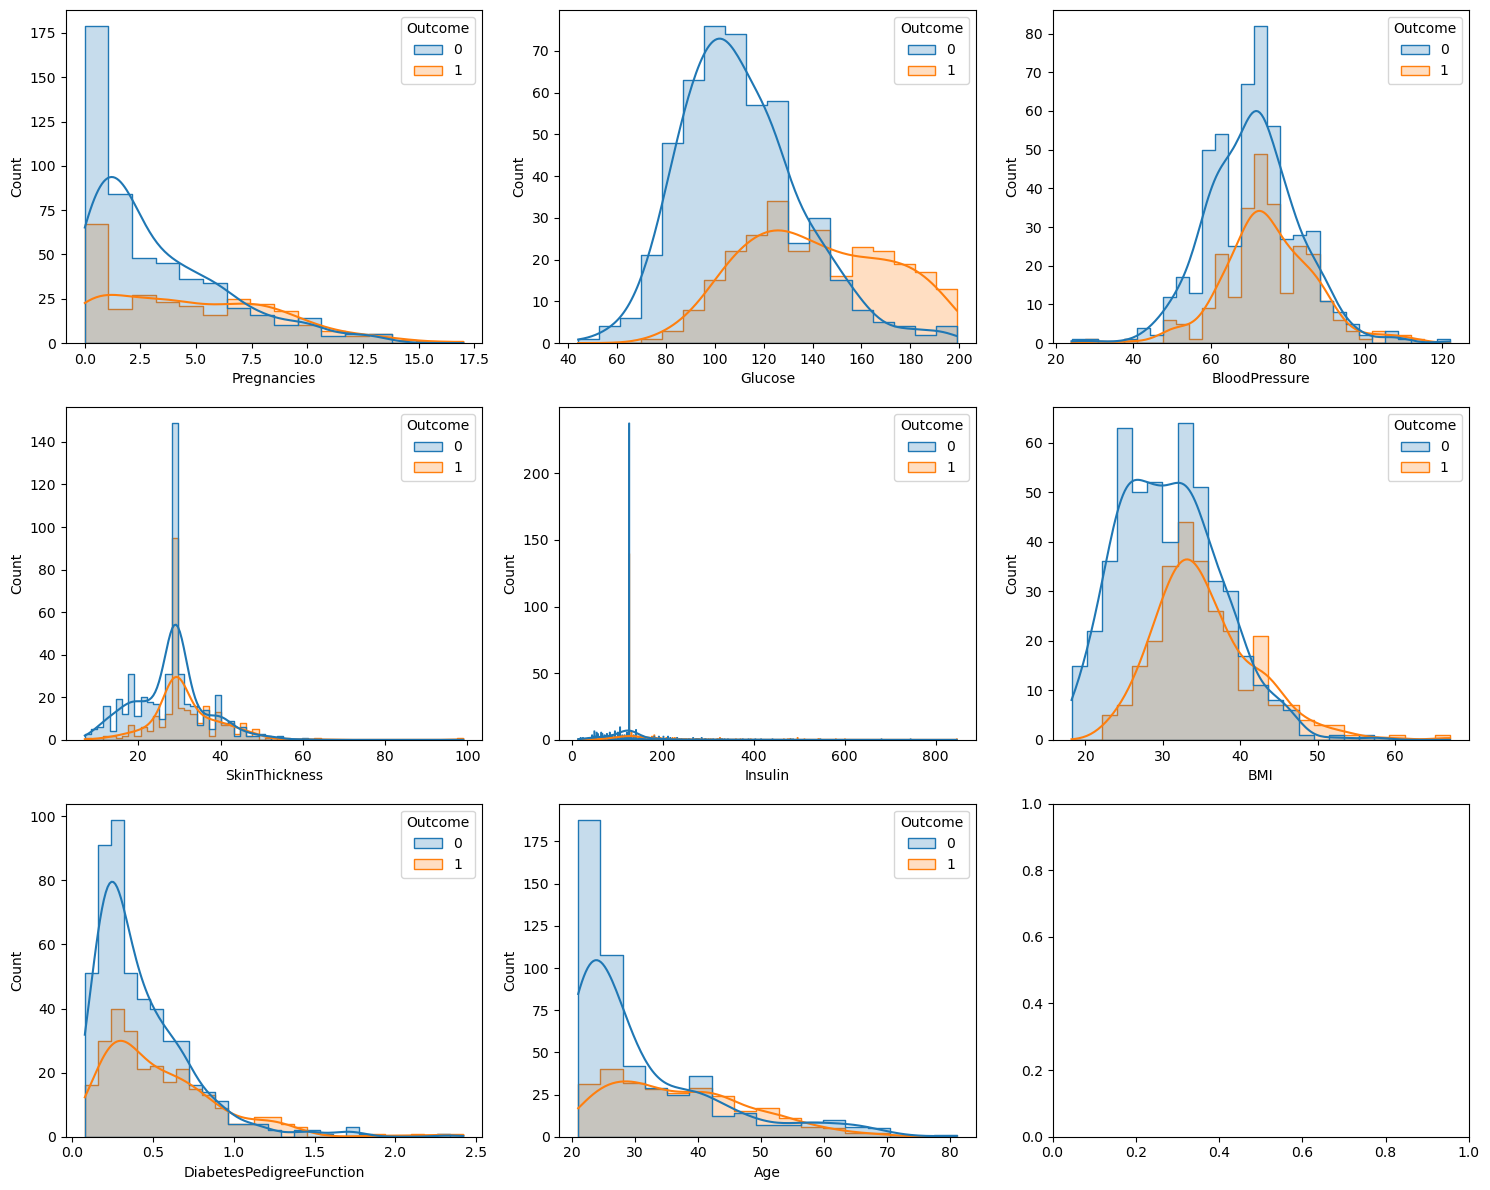

In [166]:
# Biểu đồ phân phối
fig, axes = plt.subplots(3, 3, figsize=(15,12))
axes = axes.flatten()

feature_cols = [col for col in data_names if col != "Outcome"]

for i, col in enumerate(feature_cols):
    sns.histplot(data=df, x=col, hue="Outcome", kde=True, ax=axes[i], element="step")
    
plt.tight_layout()
plt.show()

**Nhận xét:**
- Glucose là đặc trưng phân biệt rõ rệt nhất giữa hai nhóm Outcome, nhóm mắc tiểu đường có giá trị Glucose cao hơn.
- BMI và Age cũng cho thấy sự khác biệt đáng kể giữa hai nhóm, nhóm mắc tiểu đường thường có BMI và tuổi cao hơn.
- Pregnancies và DiabetesPedigreeFunction có ảnh hưởng nhưng mức độ phân biệt yếu hơn.
- BloodPressure và SkinThickness có sự phân bố khá giống nhau ở cả hai nhóm, ít giá trị phân biệt.
- Insulin có nhiều giá trị bất thường, phân phối rộng, cần xử lý kỹ hơn nếu dùng cho mô hình.

#### 3.2.3. So sánh phân phối đặc trưng theo Outcome bằng Boxplot

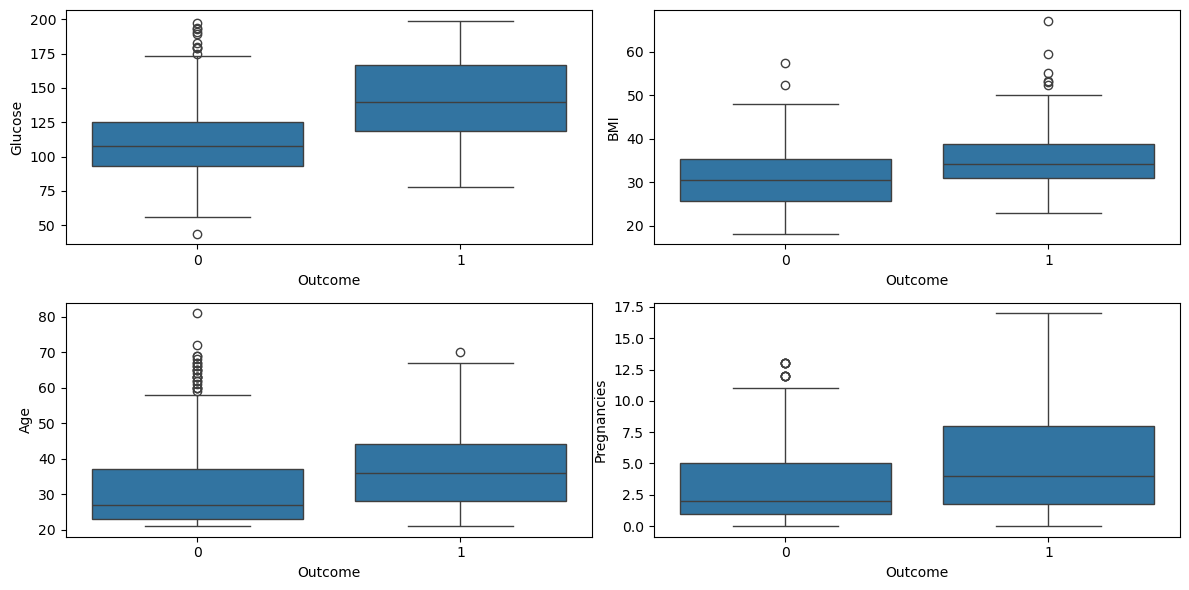

In [167]:
# Boxplot so sánh Outcome
plt.figure(figsize=(12,6))
for i, col in enumerate(['Glucose','BMI','Age','Pregnancies']):
    plt.subplot(2,2,i+1)
    sns.boxplot(x="Outcome", y=col, data=df)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Glucose: Nhóm Outcome=1 có median cao hơn rõ rệt so với nhóm Outcome=0, đồng thời phân phối rộng hơn và nhiều giá trị ngoại lai. Điều này khẳng định Glucose là yếu tố quan trọng nhất trong chẩn đoán tiểu đường.
- BMI: Median BMI của nhóm Outcome=1 cũng cao hơn rõ rệt, xuất hiện nhiều outlier ở mức BMI rất cao. Người có BMI cao dễ mắc tiểu đường hơn.
- Age: Nhóm Outcome=1 có median tuổi cao hơn, phân phối rộng và nhiều outlier ở tuổi cao. Tuổi càng lớn, nguy cơ mắc tiểu đường càng tăng.
- Pregnancies: Median số lần mang thai ở nhóm Outcome=1 cao hơn một chút, có nhiều outlier. Số lần mang thai có ảnh hưởng nhưng yếu hơn so với Glucose và BMI.

#### 3.2.4. Heatmap tương quan giữa các đặc trưng

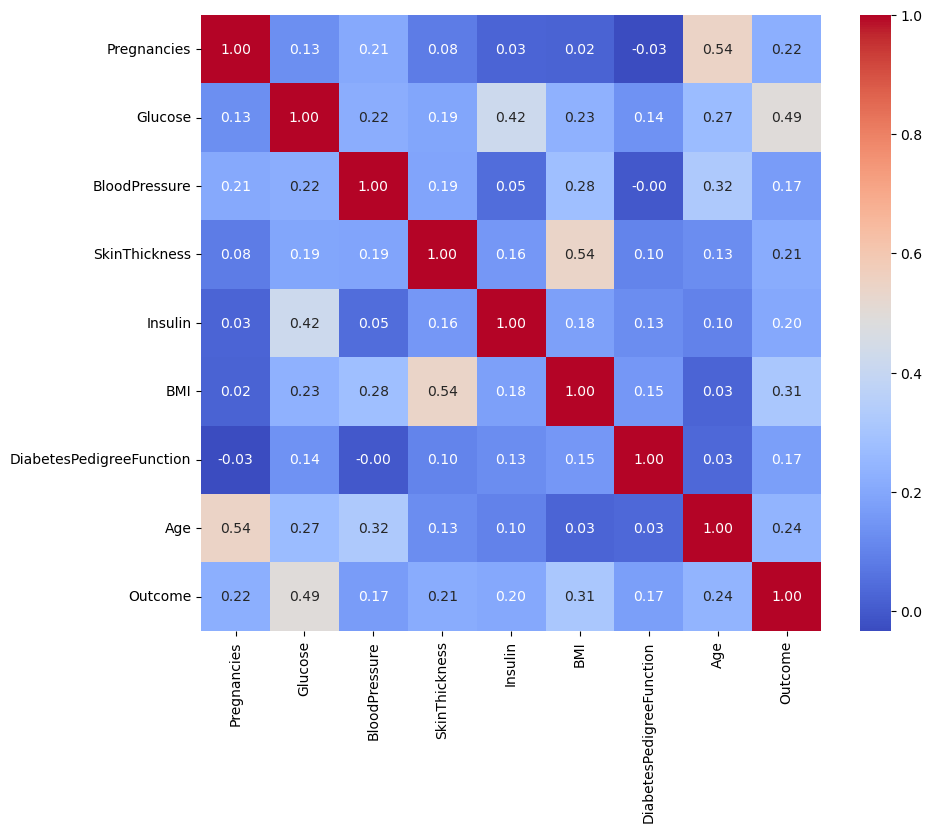

In [168]:
# Heatmap tương quan
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

**Nhận xét:**
- Heatmap giúp trực quan hóa mối liên hệ giữa các biến, hỗ trợ lựa chọn đặc trưng khi xây dựng mô hình dự đoán.

## Kết thúc phân tích